### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [85]:
data = pd.read_csv('/content/drive/MyDrive/data/coupons.csv')

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [88]:
totalMissing = data.isnull().sum()
totalMissingPercent = (totalMissing / len(data)) * 100
dataMissing = pd.DataFrame({'Total Missing': totalMissing, 'Missing Percent': totalMissingPercent})
print(dataMissing[dataMissing['Total Missing'] > 0].sort_values(by='Total Missing', ascending=False))

                      Total Missing  Missing Percent
car                           12576        99.148534
CoffeeHouse                     217         1.710817
Restaurant20To50                189         1.490066
CarryAway                       151         1.190476
RestaurantLessThan20            130         1.024913
Bar                             107         0.843582


3. Decide what to do about your missing data -- drop, replace, other...

In [89]:
# drop car since more than 99% are missing
data.drop(columns=['car'], inplace=True)

#replace the other columns with no value as NoVal
noValCols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[noValCols] = data[noValCols].fillna("NoVal")

#remove duplicates
duplicates = data.duplicated().sum()
if duplicates > 0:
    data.drop_duplicates(inplace=True)


4. What proportion of the total observations chose to accept the coupon?



In [90]:
totalObservations = len(data)

# total accepted (Y = 1)
totalAccepted = data['Y'].sum()

# proportion of accepted coupons
acceptanceRate = totalAccepted / totalObservations

print (f"Proportion of the total observations chose to accept: {acceptanceRate}")

Proportion of the total observations chose to accept: 0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

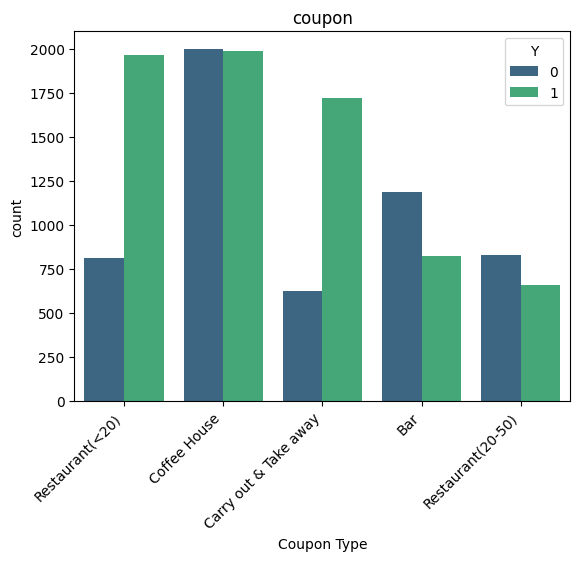

In [91]:

sns.countplot(data=data, x="coupon", hue='Y',  palette="viridis")
plt.xlabel('Coupon Type')
plt.xticks(rotation=45, ha='right')
plt.title('coupon')
plt.show()

6. Use a histogram to visualize the temperature column.

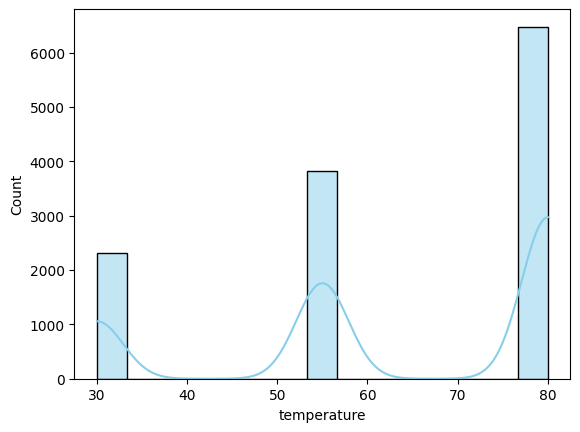

In [92]:
sns.histplot(
    data=data,
    x="temperature",
    bins=15,           # Adjust bin size for clarity
    kde=True,          # Adds a smooth curve
    color="skyblue"
)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [93]:
barCoupons = data[data['coupon'] == 'Bar']
display(barCoupons.head())

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


Text(0, 0.5, 'Count')

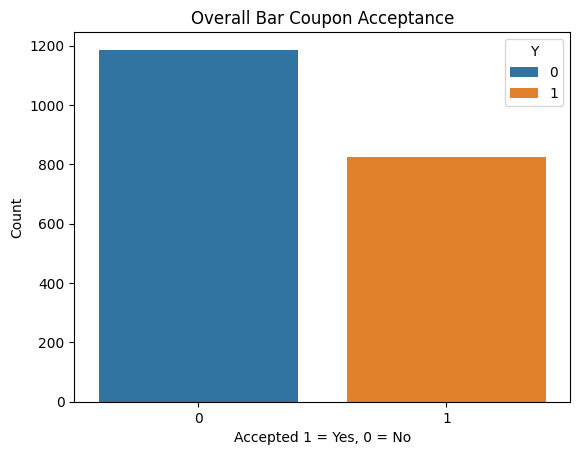

In [94]:
barCoupons = data[data['coupon'] == 'Bar']
proportionAccepted = barCoupons['Y'].mean()
sns.countplot(x='Y', data=barCoupons, hue='Y')
plt.title('Overall Bar Coupon Acceptance')
plt.xlabel('Accepted 1 = Yes, 0 = No')
plt.ylabel('Count')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.



Acceptance rate went to bar:
         BarGroup  AcceptanceRate
0  >3 times/month        0.768844
1  ≤3 times/month        0.370391


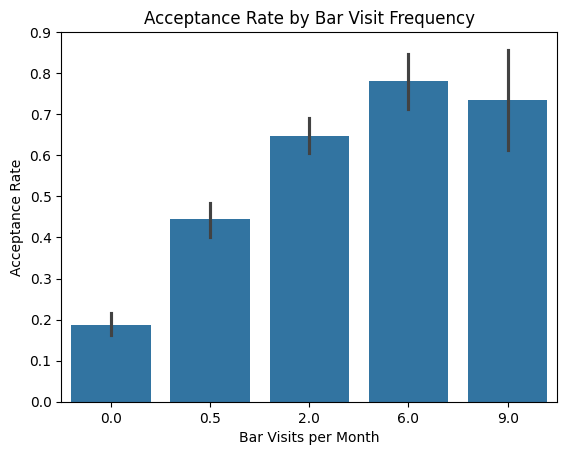

In [95]:
barCoupons =  data[data['coupon'] == 'Bar'].copy()

#replace bar coupon values to number
barCoupons['Bar'] = (
    barCoupons['Bar']
    .replace({
        'never': 0, 'Never': 0,
        'less1': 0.5, 'Less1': 0.5,
        '1~3': 2, '4~8': 6, 'gt8': 9
    })
)
barCoupons['Bar'] = pd.to_numeric(barCoupons['Bar'], errors='coerce')
barCoupons = barCoupons.dropna(subset=['Bar'])
barCoupons['BarGroup'] = barCoupons['Bar'].apply(
    lambda x: '≤3 times/month' if x <= 3 else '>3 times/month'
)
acceptanceByGroup = (
    barCoupons.groupby('BarGroup')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'AcceptanceRate'})
)

print("\nAcceptance rate went to bar:")
print(acceptanceByGroup)
sns.barplot(x='Bar', y='Y', data=barCoupons)
plt.title('Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visits per Month')
plt.ylabel('Acceptance Rate')
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?



Acceptance Rate Comparison (GroupBy with Numeric Age):
          Group  Acceptance_Rate
0  Bar Goer >25         0.695238
1         Other         0.333971
Proportion of Bar coupons accepted:  40.995025%


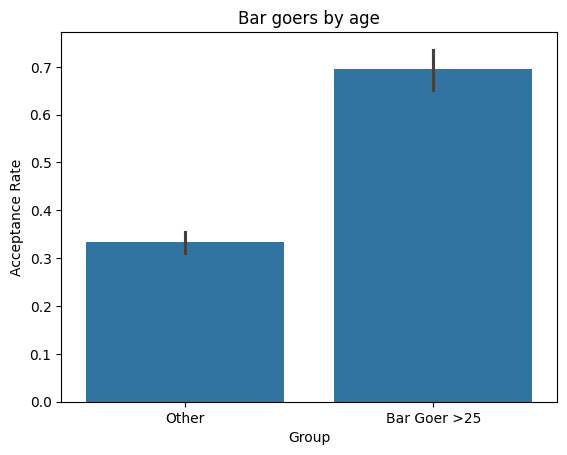

In [96]:
def convertAgeToNumber(age):
    if isinstance(age, str):
        age = age.strip().lower()
        if 'below21' in age:
            return 20
        elif '21-25' in age:
            return 23
        elif '26-30' in age:
            return 28
        elif '31-35' in age:
            return 33
        elif '36-40' in age:
            return 38
        elif '41-45' in age:
            return 43
        elif '46-50' in age:
            return 48
        elif '50plus' in age or '50+' in age:
            return 55
    try:
        return float(age)
    except:
        return None

barCoupons['age'] = barCoupons['age'].apply(convertAgeToNumber)

# Drop missing values in 'Bar' or 'age'
barCoupons = barCoupons.dropna(subset=['Bar', 'age'])

# --- Create grouping column ---
barCoupons['Group'] = barCoupons.apply(
    lambda x: 'Bar Goer >25' if (x['Bar'] > 1 and x['age'] > 25) else 'Other',
    axis=1
)

# Use groupby to compare acceptance rates
acceptanceByGroup = (
    barCoupons.groupby('Group')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'Acceptance_Rate'})
)


print("\nAcceptance Rate Comparison (GroupBy with Numeric Age):")
print(acceptanceByGroup)
print(f"Proportion of Bar coupons accepted: {proportionAccepted: %}")
sns.barplot(x='Group', y='Y', data=barCoupons)
plt.title('Bar goers by age')
plt.xlabel('Group')
plt.ylabel('Acceptance Rate')
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [97]:
def groupOcuppation(row):
    goesToBar = row['Bar'] > 1
    notKid = 'Kid' not in str(row['passanger'])
    otherOccupation = row['occupation'] not in ['Farming', 'Fishing', 'Forestry', 'Farming, Fishing, or Forestry']

    if goesToBar and notKid and otherOccupation:
        return 'not a kid and other occupation'
    else:
        return 'farming, fishing, or forestry'

barCoupons['Group'] = barCoupons.apply(groupOcuppation, axis=1)

#Use group by acceptance rates
acceptanceByGroup = (
    barCoupons.groupby('Group')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'Acceptance_Rate'})
)

print("\nAcceptance Rate Occupation Comparison:")
for _, row in acceptanceByGroup.iterrows():
    print(f"{row['Group']}: {row['Acceptance_Rate']:%}")





Acceptance Rate Occupation Comparison:
farming, fishing, or forestry: 29.415855%
not a kid and other occupation: 71.324864%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.




Acceptance Rate by Group Condition
                                      Group  Acceptance_Rate
0         Go to bars more than once a month         0.514286
1  Go to cheap restaurant more than 4 times         0.351852


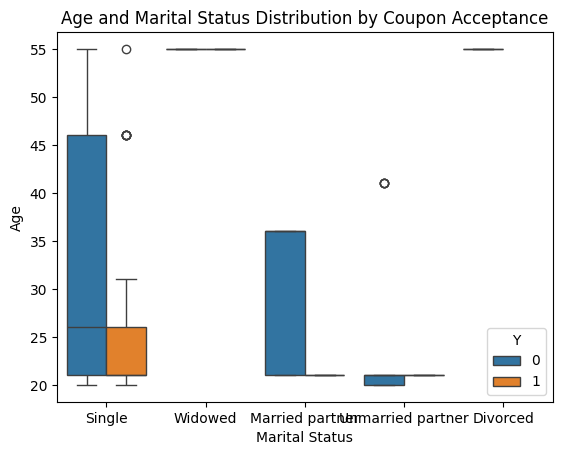

In [98]:
barCoupons['age'] = barCoupons['age'].apply(convertAgeToNumber)
barCoupons['RestaurantLessThan20'] = (
    barCoupons['RestaurantLessThan20']
    .replace({
        'never': 0, 'Never': 0,
        'less1': 0.5, 'Less1': 0.5,
        '1~3': 2, '4~8': 6, 'gt8': 9
    })
)
barCoupons['RestaurantLessThan20'] = pd.to_numeric(barCoupons['RestaurantLessThan20'], errors='coerce')

# Convert income to number
def convertIncome(val):
    if isinstance(val, str):
        val = val.replace('$', '').replace(',', '').strip()
        if 'less than' in val.lower():
            return 25000
        elif '50k' in val.lower() and 'less' not in val.lower():
            return 50000
        elif '75k' in val.lower():
            return 75000
        elif '100k' in val.lower():
            return 100000
    return None
barCoupons['Bar'] = pd.to_numeric(barCoupons['Bar'], errors='coerce')
barCoupons['income'] = barCoupons['income'].apply(convertIncome)


# Drop rows missing any data
barCoupons = barCoupons.dropna(subset=['Bar', 'RestaurantLessThan20', 'age', 'income', 'passanger', 'maritalStatus'])

# --- Define the target group conditions ---
def groupConditions(row):
    groupCondition1 = (row['Bar'] > 1) and ('Kid' not in str(row['passanger'])) and (str(row['maritalStatus']).lower() != 'widowed')
    groupCondition2 = (row['Bar'] > 1) and (row['age'] < 30)
    groupCondition3 = (row['RestaurantLessThan20'] > 4) and (row['income'] < 50000)
    return groupCondition1 or groupCondition2 or groupCondition3

barCoupons['Group'] = barCoupons.apply(lambda x: 'Go to bars more than once a month' if groupConditions(x) else 'Go to cheap restaurant more than 4 times', axis=1)

# --- Group by and calculate acceptance rate ---
acceptanceByGroup = (
    barCoupons.groupby('Group')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'Acceptance_Rate'})
)

# --- Display results ---
print("\nAcceptance Rate by Group Condition")
print(acceptanceByGroup)
sns.boxplot(x='maritalStatus', y='age', hue='Y', data=barCoupons)
plt.title('Age and Marital Status Distribution by Coupon Acceptance')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NoVal,4~8,1~3,1,0,0,0,1,0



Proportion of Coffee House coupons accepted: 49.862121%


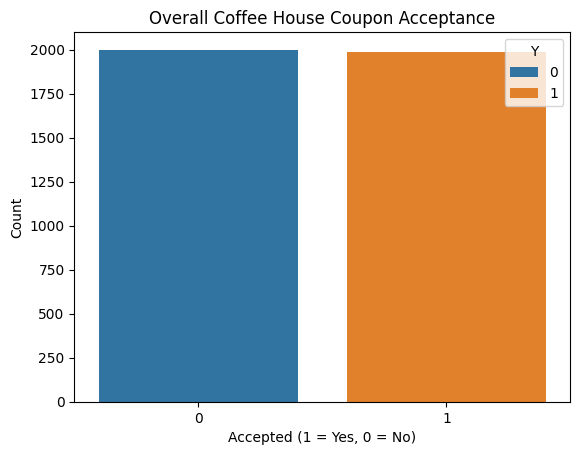

In [99]:
# Let's explore Coffee House coupons:
coffeeCoupons = data[data['coupon'] == 'Coffee House'].copy()
display(coffeeCoupons.head())

# Proportion of coffee coupons accepted
coffeeProportionAccepted = coffeeCoupons['Y'].mean()
print(f"\nProportion of Coffee House coupons accepted: {coffeeProportionAccepted:%}")

# Visualize overall coffee coupon acceptance
sns.countplot(x='Y', data=coffeeCoupons, hue='Y')
plt.title('Overall Coffee House Coupon Acceptance')
plt.xlabel('Accepted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()